Dự đoán giá đóng cửa giá cổ phiếu của APPLE inc:

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Đọc dữ liệu chứng khoán từ yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime


# Các cổ phiếu công nghệ sẽ sử dụng cho phân tích này
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Thiết lập thời gian Kết thúc và Bắt đầu để lấy dữ liệu
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
# df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Nhận báo giá cổ phiếu
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2024-04-06')
# Hiển thị dữ liệu
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400
...,...,...,...,...,...,...
2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700


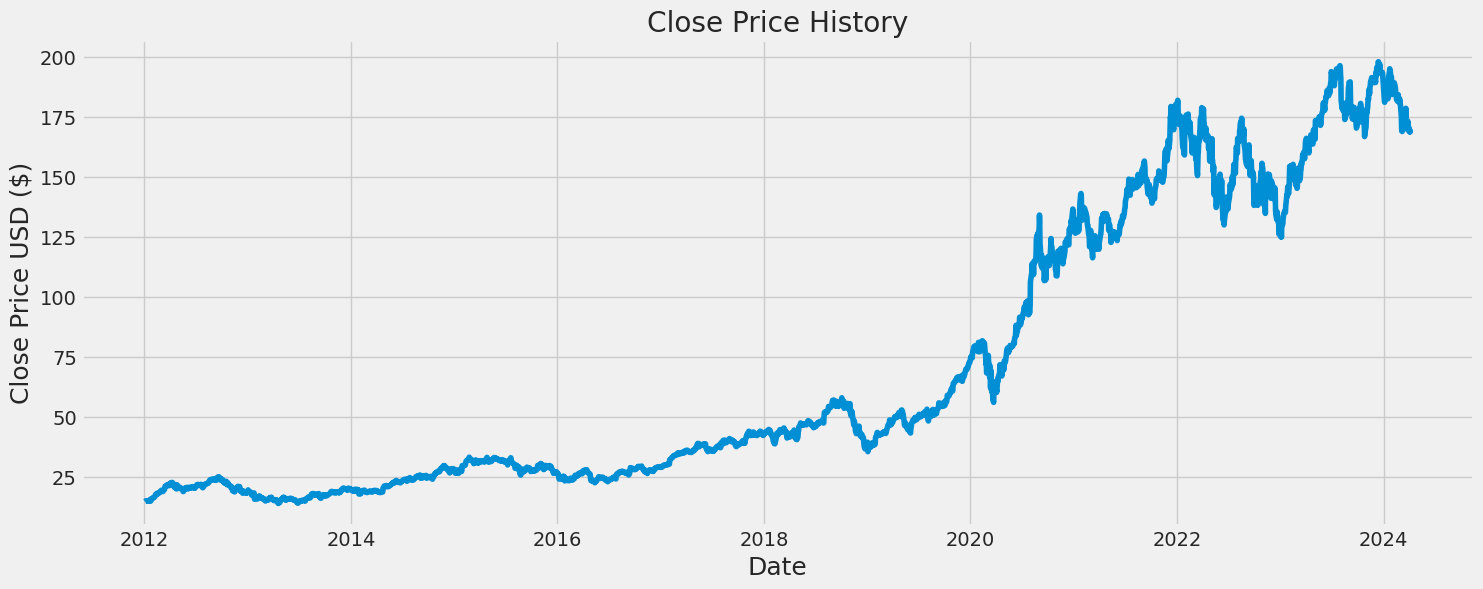

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Tạo một khung dữ liệu mới chỉ với cột  'Close column
data = df.filter(['Close'])
# Chuyển đổi khung dữ liệu thành một mảng có nhiều mảng
dataset = data.values
# Lấy số hàng để huấn luyện mô hình
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2930

In [ ]:
# Chia tỷ lệ dữ liệu
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84546253],
       [0.84095571],
       [0.84508247]])

In [ ]:
# Tạo tập dữ liệu huấn luyện
# Tạo tập dữ liệu đào tạo theo tỷ lệ
train_data = scaled_data[0:int(training_data_len), :]
# Chia dữ liệu thành tập dữ liệu x_train và y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Chuyển đổi x_train và y_train thành mảng có nhiều mảng
x_train, y_train = np.array(x_train), np.array(y_train)

# Định hình lại dữ liệu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2870/2870 [==============================] - 160s 55ms/step - loss: 0.0011


In [ ]:
# Tạo tập dữ liệu thử nghiệm
# Tạo một mảng mới chứa các giá trị được chia tỷ lệ từ chỉ mục 1543 đến 2002
test_data = scaled_data[training_data_len - 60: , :]
# Tạo tập dữ liệu x_test và y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Chuyển đổi dữ liệu thành một mảng có nhiều mảng
x_test = np.array(x_test)

# Định hình lại dữ liệu
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Nhận các mô hình giá trị dự đoán
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Lấy lỗi bình phương trung bình gốc (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 73ms/step


4.205827398628812

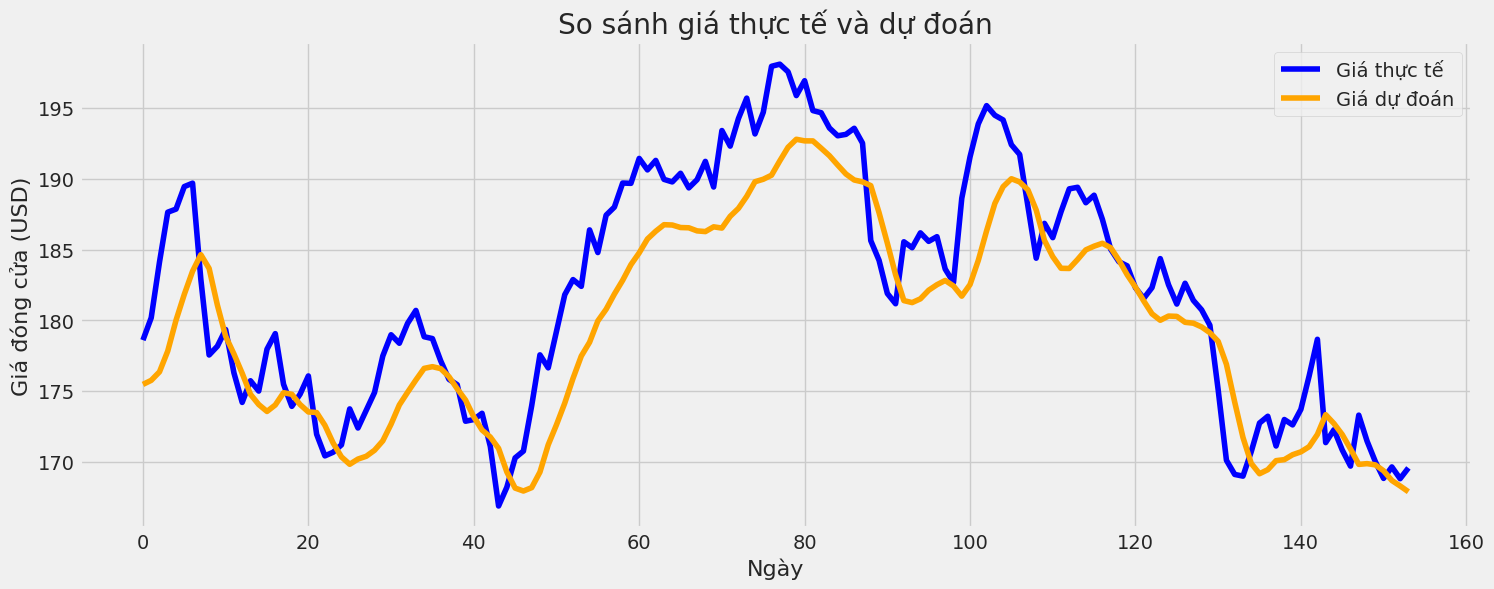

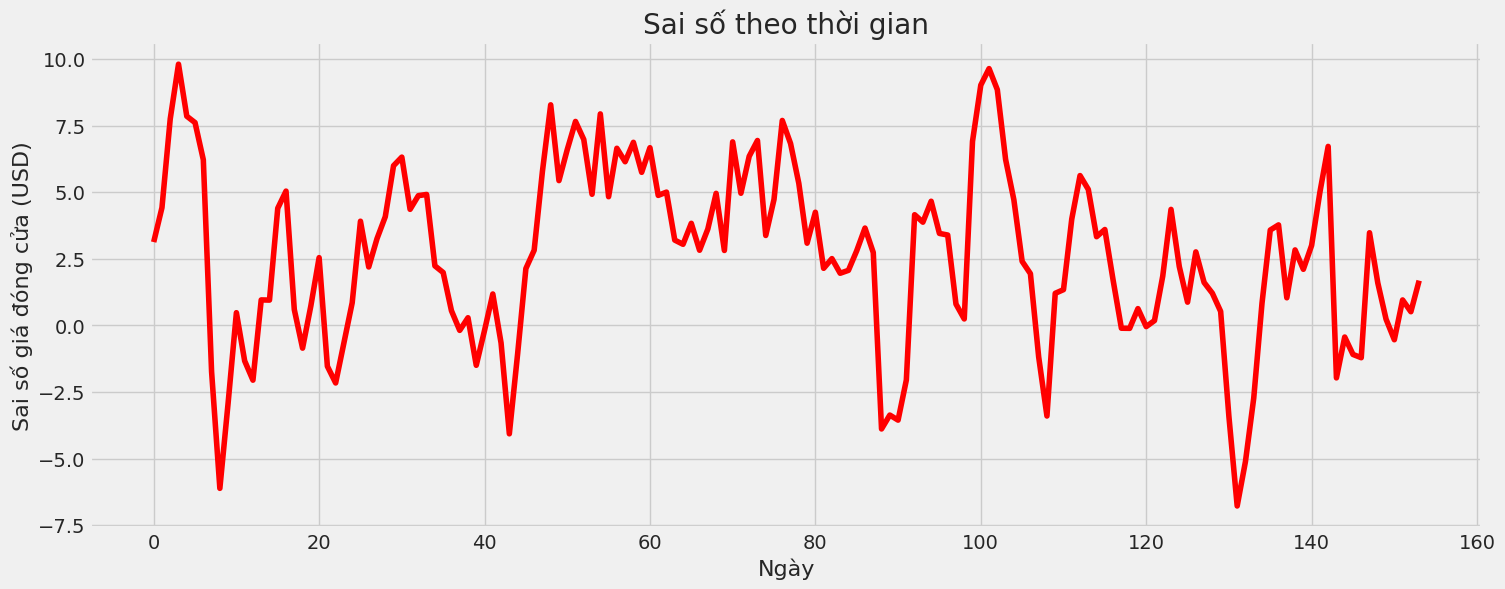

RMSE: 4.205827398628812
MAE: 4.205827398628812
MPE: 1.8868936016146292


In [ ]:
from sklearn.metrics import mean_squared_error

# Tính toán MAE và MPE
mae = mean_squared_error(y_test, predictions, squared=False)
mpe = (np.mean(abs((predictions - y_test) / y_test)) * 100)

# Biểu diễn đồ thị
plt.figure(figsize=(16, 6))
plt.title('So sánh giá thực tế và dự đoán')
plt.plot(y_test, label='Giá thực tế', color='blue')
plt.plot(predictions, label='Giá dự đoán', color='orange')
plt.xlabel('Ngày', fontsize=16)
plt.ylabel('Giá đóng cửa (USD)', fontsize=16)
plt.legend()
plt.show()

# Phân tích sai số theo thời gian
plt.figure(figsize=(16, 6))
plt.title('Sai số theo thời gian')
plt.plot(y_test - predictions, label='Sai số', color='red')
plt.xlabel('Ngày', fontsize=16)
plt.ylabel('Sai số giá đóng cửa (USD)', fontsize=16)
plt.show()

print('RMSE:', rmse)
print('MAE:', mae)
print('MPE:', mpe)

<ipython-input-21-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


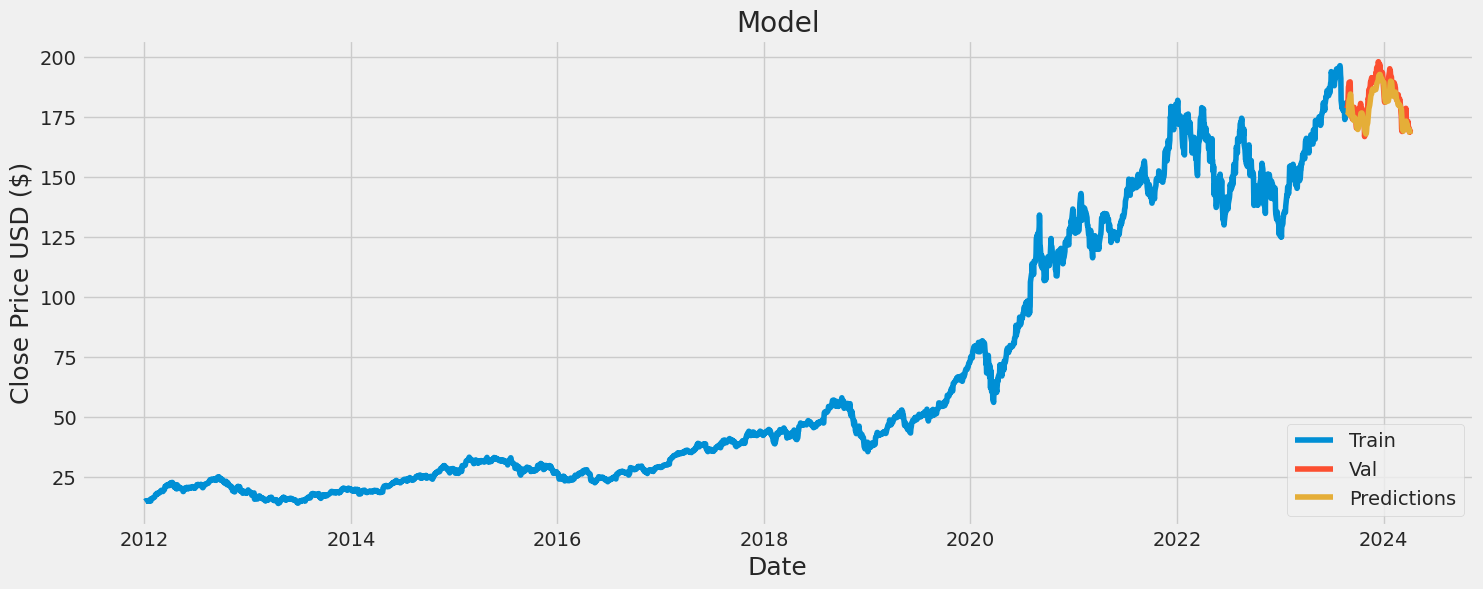

In [ ]:
# Vẽ biểu đồ
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Trực quan dữ liệu
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2023-08-25,178.610001,175.481644
2023-08-28,180.190002,175.767731
2023-08-29,184.119995,176.366959
2023-08-30,187.649994,177.841141
2023-08-31,187.869995,180.014603
...,...,...
2024-04-01,170.029999,169.796066
2024-04-02,168.839996,169.378128
2024-04-03,169.649994,168.693222


In [ ]:
valid.to_csv("df-apple-close-predictions")